In [4]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.special import logsumexp
import scipy.stats as stats
import json
import natsort

In [7]:
root_dir = "/home/joseph.bayley/data/CBC/O4/test_sets_gaussnoise/1024Hz_1s_full_15par_2det_fullparam/test_dynesty2/"

In [8]:
wave_dir = "/home/joseph.bayley/data/CBC/O4/test_sets_gaussnoise/1024Hz_1s_full_15par_2det_fullparam//test_waveforms/"

In [11]:
bounds_file = "/home/joseph.bayley/projects/Vitamin/vitamin_c_refact/vitamin_c/params_files_1024Hz_1s_polarisation/bounds.json"

In [12]:
with open(os.path.join(root_dir, "1024Hz_1s_full_15par_2det_fullparam_0_samples.dat"),"r") as f:
    labels = [str(i).strip("\n") for i in f.readline().split(" ")]

In [13]:
labels

['mass_1',
 'mass_2',
 'luminosity_distance',
 'dec',
 'ra',
 'theta_jn',
 'psi',
 'a_1',
 'a_2',
 'tilt_1',
 'tilt_2',
 'phi_12',
 'phi_jl',
 'geocent_time']

In [14]:
with open(bounds_file,"r") as f:
    bounds = json.load(f)

In [15]:
scales = {}
total_scale = 1
for lab in labels:
    if lab in ["phi_12","phi_jl"]:
        scales[lab] = 1
    elif lab in ["psi"]:
        scales[lab] = np.pi/2
    elif lab in ["phase"]:
        scales[lab] = np.pi
    else:
        scales[lab] = np.abs(bounds[lab + "_max"] - bounds[lab + "_min"])
    total_scale *= scales[lab]

In [16]:
total_scale

7479640420.970608

In [17]:
files = natsort.natsorted([os.path.join(root_dir,f) for f in os.listdir(root_dir) if f.endswith(".h5py")])
waveform_files = natsort.natsorted([os.path.join(wave_dir,f) for f in os.listdir(wave_dir) if f.strip(" ...").endswith(".h5py")])
hdf5files = natsort.natsorted([os.path.join(root_dir,f) for f in os.listdir(root_dir) if f.endswith(".hdf5")])

In [36]:
files

['/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam/test_2_dynesty2/1024Hz_1s_full_15par_2det_fullparam_0.h5py',
 '/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam/test_2_dynesty2/1024Hz_1s_full_15par_2det_fullparam_1.h5py',
 '/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam/test_2_dynesty2/1024Hz_1s_full_15par_2det_fullparam_2.h5py',
 '/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam/test_2_dynesty2/1024Hz_1s_full_15par_2det_fullparam_3.h5py',
 '/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam/test_2_dynesty2/1024Hz_1s_full_15par_2det_fullparam_4.h5py',
 '/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam/test_2_dynesty2/1024Hz_1s_full_15par_2det_fullparam_5.h5py',
 '/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam/test_2_dynesty2/1024Hz_1s_full_15par_2det_fullparam_6

In [62]:
with h5py.File(hdf5files[0],"r") as f:
    print(f.keys())
    print(np.array(f['log_evidence']))

<KeysViewHDF5 ['__module__', '__name__', 'constraint_parameter_keys', 'fixed_parameter_keys', 'information_gain', 'injection_parameters', 'label', 'log_bayes_factor', 'log_evidence', 'log_evidence_err', 'log_likelihood_evaluations', 'log_noise_evidence', 'log_prior_evaluations', 'meta_data', 'nested_samples', 'outdir', 'parameter_labels', 'parameter_labels_with_unit', 'posterior', 'priors', 'sampler', 'sampler_kwargs', 'samples', 'sampling_time', 'search_parameter_keys', 'use_ratio', 'version']>
-1025.1489926759298


In [16]:
log_evidences = np.array([-1025.437, -960.12,-967.734, -958.845, -1036.076, -1003.259, -1018.907, -1003.116, -996.577, -1030.878])

In [17]:
log_evidences - total_scale

array([-5.90568737e+11, -5.90568737e+11, -5.90568737e+11, -5.90568737e+11,
       -5.90568737e+11, -5.90568737e+11, -5.90568737e+11, -5.90568737e+11,
       -5.90568737e+11, -5.90568737e+11])

\begin{equation}
H = -E_{p(y)}\left[ \int p(x \mid y) \log{p(x \mid y)} dx\right]
\end{equation}
which can be written as
\begin{equation}
H =  \int \int p(y) p(x \mid y) \log{p(x \mid y)} dx dy
\end{equation}

Another way may be to use importance sampling as we have a set of samples $x_i$ drawn from $p(x \mid y)$.
Where importance sampling is a way to evaluate the integral
\begin{equation}
I = \int f(x) dx
\end{equation}
which can be rewritten using a weight function $w(x)$ 
\begin{equation}
I = \int  \frac{f(x)}{w(x)} w(x) dx.
\end{equation}
We can then draw a set of points from the distribution $w(x)$, which allows us to evaluate the integral as
\begin{equation}
I = \frac{1}{N}\sum_i^N  \frac{f(x_i)}{w(x_i)}.
\end{equation}
We can rewrite this in terms of our integral in the entropy.
\begin{equation}
H = -E_{p(y)}\left[ \int p(x \mid y) \log{p(x \mid y)} dx\right] = E_{p(y)}\left[ I \right].
\end{equation}
We can calculate the integral $I$ over dx using our samples $x_i$ which are from $w(x) = p(x \mid y)$ where we can set 
$f(x) = p(x \mid y) \log{p(x \mid y)}$

\begin{equation}
I = \frac{1}{N}\sum_i^N  \frac{p(x_i \mid y) \log{p(x_i \mid y)}}{p(x_i \mid y)} = \frac{1}{N}\sum_i^N  \log{p(x_i \mid y)} = \frac{1}{N}\sum_i^N  \log{\frac{p(x_i)p(y \mid x_i)}{p(y)}}
\end{equation}
which we can expand out the log such that we have two distributions for which we have access to the values of
\begin{equation}
\begin{split}
I &= \frac{1}{N}\sum_i^N  \log{p(x_i)} + \log{p(y \mid x_i)} - \log{p(y)} \\
&= -\log{p(y)} + \frac{1}{N}\sum_i^N  \log{p(x_i)} + \log{p(y \mid x_i)}
\end{split}
\end{equation}
The expectation value of the integral then becomes
\begin{equation}
\begin{split}
H &=  -\left< I \right> = \left< \log{p(y)} - \frac{1}{N}\sum_i^N  \left[\log{p(x_i)} + \log{p(y \mid x_i)}\right] \right>
\end{split}
\end{equation}

Rescaling the prior distribution:
\begin{equation}
\begin{split}
x^{(R)} &= s x \\
\frac{dx^{(R)}}{dx} &= s \\
p(x^{(R)}) &= p(x) \left| \frac{dx}{dx^{(R)}} \right| \\
\end{split}
\end{equation}
where $s_i$ is the scaling of each of the parameters 
The determinant of the Jacobian is the product of the diagonals, therefore
\begin{equation}
p(x^{(R)}) = p(x) \frac{1}{ \prod_i s_i}
\end{equation}

Rescaling the likelihood.
We rescale the timeseries by a factor of $s_y$, which is equivalent to rescaling the frequency spectrum by the same amount
\begin{equation}
p(y \mid x) = \prod_i^N \frac{1}{2 \pi S_n(f_i)} \exp{ \left\{ \frac{nn^{*}}{S_n(f)} \right\}}
\end{equation}
\begin{equation}
p(y^{(R)} \mid x^{(R)}) = \prod_i^N \frac{1}{2 \pi S_n(f_i) s_y} \exp{ \left\{ \frac{nn^{*} s_y}{S_n(f) s_y} \right\}}
\end{equation}
where $s_y$ is the scaling of the data
Therefore,
\begin{equation}
\begin{split}
p(y^{(R)} \mid x^{(R)}) &= \left( \frac{1}{s_y}\right)^N p(y \mid x) \\
\log p(y^{(R)} \mid x^{(R)}) &= \log \left[\left( \frac{1}{s_y}\right)^N p(y \mid x) \right] \\
&= \log p(y \mid x) - N \log(s_y)
\end{split}
\end{equation}

Rescaling the Evidence
\begin{equation}
p(y) = Z = \int p(y|x)p(x)dx
\end{equation}
\begin{equation}
\begin{split}
p(y^{(R)}) &= Z^{(R)} = \int p(y^{(R)}|x^{(R)})p(x^{(R)})dx^{(R)} \\
& = \int p(y^{(R)}|x^{(R)})p(x)dx \\
&= \left( \frac{1}{s_y}\right)^N \int p(y \mid x)p(x)dx \\
&= \left( \frac{1}{s_y}\right)^N Z
\end{split}
\end{equation}
Therefore 
\begin{equation}
\log Z^{(R)} = \log Z - N\log(s_y)
\end{equation}

In [18]:
np.log(total_scale)

27.104351869093183

In [18]:
all_summed_int = []
y_scale = 1./16
datalen = 1024*2
for i, fname in enumerate(files):
    with h5py.File(hdf5files[i],"r") as f:
        log_z = np.array(f["log_evidence"]) - np.array(f["log_noise_evidence"])
    with h5py.File(fname,"r") as f:
        scaled_log_likelihood = np.array(f["log_likelihood_post"]) #- datalen*np.log(y_scale) 
        scaled_log_prior = np.array(f["log_prior_post"]) + np.log(total_scale)
        scaled_log_evidence = log_z #- datalen*np.log(y_scale) 
        
        #print(np.min(scaled_prior), np.max(scaled_prior))
        #print(np.min(scaled_likelihood), np.max(scaled_likelihood))
        print(scaled_log_evidence, np.sum(scaled_log_prior)/len(scaled_log_prior), np.sum(scaled_log_likelihood)/len(scaled_log_likelihood))
        all_summed_int.append(scaled_log_evidence - np.sum(scaled_log_prior)/len(scaled_log_prior) - np.sum(scaled_log_likelihood)/len(scaled_log_likelihood))


-1.3692282295909308 -3.619015923473933 3.402490631859373
305.3081861683381 -4.362893436025396 323.0661162044372
272.3665729488049 -3.986854053610091 289.77925998192234
4.206731836469885 -3.881642344947894 15.956729372226526
175.85684038523664 -4.2939291972696845 192.94076481577127
-2.762185208888809 -3.6465923006456165 0.30823819771787503
543.8976464246462 -4.697374552406122 568.6013361795447
24.96500363390419 -4.236881097201776 43.17048977926802
45.40770420227693 -2.964907765131226 73.29810265081345
51.73130476234155 -3.3303289466801274 64.14694534217584
1374.1757951072348 -3.681555334477934 1402.3343487638563
41.10147964242219 -4.237419917212247 56.682824621303716
121.51132173479732 -3.9853719633319242 139.40181215181045
53.13446232752267 -3.686010808738988 69.70931025377969
0.7705488595709085 -3.656162833537538 9.145656790625305
-0.29781489200945543 -3.5402702444119534 6.864013977084178
-0.2150956273223983 -3.601185836344714 5.673289201797757
58.43913064871572 -4.276156322353819 73.

In [77]:
np.array(all_summed_int)

array([-8.84593028e-01, -1.22521027e+01, -1.57634671e+01, -3.74001605e+00,
       -1.56975005e+01, -3.07248860e-01, -2.04554663e+01, -1.50350877e+01,
       -2.68014646e+01, -8.26522254e+00, -2.43217817e+01, -1.09903980e+01,
       -1.59621760e+01, -1.16738185e+01, -1.01103419e+01, -2.48544743e+00,
       -1.95147411e-01, -9.35987750e+00, -5.14536992e+00, -2.16461510e+01,
       -1.16100587e+01, -4.55503715e+00, -1.54758057e+00, -4.19612681e+01,
       -1.08807440e+01, -8.06847600e+00, -7.58815736e+00,  2.20193740e-01,
       -6.06320248e+00, -1.12586617e+01, -3.53788643e+01, -4.94940929e-03,
       -4.95598631e+00, -8.04574689e+00, -3.78804850e+00, -3.29849367e+00,
       -1.55673570e+01, -1.03460810e+01, -1.10907061e+01, -9.69079846e+00,
       -9.21206962e+00, -4.40983550e+00, -1.45363017e+01, -7.80688274e+00,
       -6.87943610e+00, -2.29839719e+01, -1.24420004e+01, -2.46293522e+01,
       -6.73034864e+00, -1.46541151e+00, -1.61888035e+01, -1.28732326e+01,
       -1.22211854e+01, -

In [19]:
np.mean(all_summed_int), np.std(all_summed_int)/np.sqrt(len(all_summed_int)), np.max(all_summed_int), np.min(all_summed_int)

(-12.794904522239708,
 0.6261545357396233,
 0.5761688940389325,
 -43.93079966993173)

In [40]:
np.where(np.abs(all_summed_int) > 20000)

(array([], dtype=int64),)

In [19]:
hdf5files[15]

'/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam/test_2_dynesty2/1024Hz_1s_full_15par_2det_fullparam_23_result.hdf5'

In [43]:
len(all_summed_int)

100

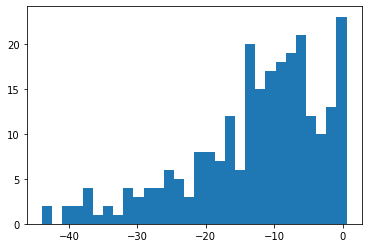

In [20]:
fig, ax = plt.subplots()
all_summed_int2 = np.array(all_summed_int)#[np.where(np.abs(all_summed_int) < 60)]
hst = ax.hist(all_summed_int, bins = 30)
#ax.set_yscale("log")
#ax.set_xscale("symlog")

In [57]:
np.std(all_summed_int)/np.sqrt(len(files))

642.5378262086593

In [22]:
with h5py.File(waveform_files[15],"r") as f:
    print(f.keys())

IndexError: list index out of range

# rescaling

In [477]:
d1 = np.array([[1,0,0],[0,2,0], [0,0,3]])
d2 = np.array([[10,0,0],[0,10,0], [0,0,9]])

In [490]:
norm1 = stats.multivariate_normal([1,0,0],d1)
norm2 = stats.multivariate_normal([1,0,0],d2)

In [491]:
xvals = np.linspace(-2,2,121)

In [492]:
X,Y,Z = np.meshgrid(xvals,xvals, xvals)

In [529]:
pd1 = norm1.pdf(np.dstack([np.ravel(X) + 1, np.ravel(Y), np.ravel(Z)]))

In [539]:
pd2 = np.sqrt(10)*np.sqrt(5)*np.sqrt(3)*norm2.pdf(np.dstack([np.ravel(X)*np.sqrt(10) + 1, np.ravel(Y)*np.sqrt(5), np.ravel(Z)*np.sqrt(3)]))

In [540]:
max(pd1), max(pd2)

(0.02592116832548878, 0.025921168325488783)

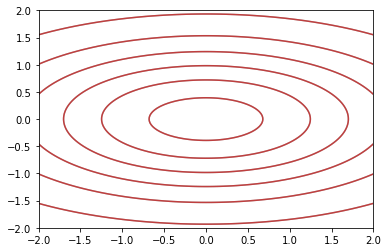

In [541]:
fig, ax = plt.subplots()
ax.contour(xvals,xvals, pd1.reshape(121,121, 121)[60], alpha = 0.5, colors= "k")
ax.contour(xvals,xvals, pd2.reshape(121,121, 121)[60], alpha = 0.5, colors = "r")
#ax.plot(xvals,pd2)

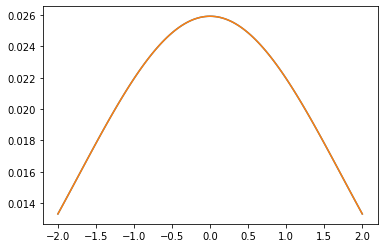

In [542]:
fig, ax = plt.subplots()
ax.plot(xvals, pd1.reshape(121,121, 121)[60,60])
ax.plot(xvals, pd2.reshape(121,121, 121)[60,60])

In [548]:
snorm1 = stats.norm(0,1)
snorm2 = stats.norm(0,10)

In [549]:
xvals = np.linspace(-2,2,121)

In [556]:
spd1 = snorm1.pdf(xvals)
spd2 = 10*snorm2.pdf(xvals*10)

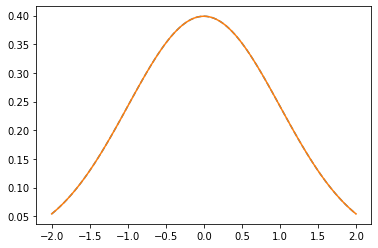

In [558]:
fig, ax = plt.subplots()
ax.plot(xvals, spd1, ls = "--")
ax.plot(xvals, spd2)

In [594]:
A = 1
fmax = 500
fb = 499.8
df = 0.15
print(np.arccos(A*fmax/(fb + df)))

nan


/home/joseph.bayley/.conda/envs/vitc_newkeras/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """


In [595]:
(499.8 + 0.15)/500

0.9999

In [596]:
(250.0 + 0.15)/500

0.5003

In [598]:
np.arccos(0.4003*500/(250 + 0.15))

0.6433012020781996